In [ ]:
!pip install qwen-vl-utils

In [ ]:
!python -m pip install git+https://github.com/huggingface/transformers

  Cloning https://github.com/huggingface/transformers to /tmp/pip-req-build-kgc54bmr
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers /tmp/pip-req-build-kgc54bmr
  Resolved https://github.com/huggingface/transformers to commit 2e24ee4dfa39cc0bc264b89edbccc373c8337086
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
!pip uninstall -y tensorflow && pip install tensorflow-cpu

In [ ]:
from transformers import Qwen2VLForConditionalGeneration, AutoTokenizer, AutoProcessor

In [ ]:
model = Qwen2VLForConditionalGeneration.from_pretrained(
    "Qwen/Qwen2-VL-2B-Instruct",
    torch_dtype="auto",
    device_map="auto",
)

processor = AutoProcessor.from_pretrained(
    "Qwen/Qwen2-VL-2B-Instruct"
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Unrecognized keys in `rope_scaling` for 'rope_type'='default': {'mrope_section'}
`Qwen2VLRotaryEmbedding` can now be fully parameterized by passing the model config through the `config` argument. All other arguments will be removed in v4.46


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

Qwen2VLForConditionalGeneration(
  (visual): Qwen2VisionTransformerPretrainedModel(
    (patch_embed): PatchEmbed(
      (proj): Conv3d(3, 1280, kernel_size=(2, 14, 14), stride=(2, 14, 14), bias=False)
    )
    (rotary_pos_emb): VisionRotaryEmbedding()
    (blocks): ModuleList(
      (0-31): 32 x Qwen2VLVisionBlock(
        (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (attn): VisionAttention(
          (qkv): Linear(in_features=1280, out_features=3840, bias=True)
          (proj): Linear(in_features=1280, out_features=1280, bias=True)
        )
        (mlp): VisionMlp(
          (fc1): Linear(in_features=1280, out_features=5120, bias=True)
          (act): QuickGELUActivation()
          (fc2): Linear(in_features=5120, out_features=1280, bias=True)
        )
      )
    )
    (merger): PatchMerger(
      (ln_q): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
      (mlp): Sequent

In [ ]:
from PIL import Image
import io

In [ ]:
image_path = "/content/English_Sample_Text3.jpg.png"

# Load the image using the file path
image = Image.open(image_path)

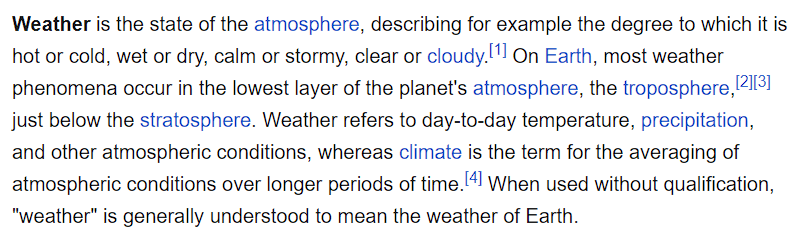

In [ ]:
image

In [ ]:
messages = [
        {
            "role": "user",
            "content": [
                {"type": "image", "image": image},
                {"type": "text", "text": "Extract all the text in Sanskrit and English from the image."}],
        }
    ]

In [ ]:
from qwen_vl_utils import process_vision_info

In [ ]:
text = processor.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
image_inputs, _ = process_vision_info(messages)

# Process inputs
inputs = processor(
    text=[text],
    images=image_inputs,
    padding=True,
    return_tensors="pt"
)

inputs = inputs.to("cuda" if torch.cuda.is_available() else "cpu")  # Move to GPU if available

In [ ]:
with torch.no_grad():
        # Inference: Generation of the output
        generated_ids = model.generate(**inputs, max_new_tokens=2000, no_repeat_ngram_size=3, temperature=0.7)
        generated_ids_trimmed = [
            out_ids[len(in_ids) :] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)
        ]
        output_text = processor.batch_decode(
            generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
        )
#return " ".join(output_text).strip()

In [ ]:
output_text

['Weather is the state of the atmosphere, describing for example the degree to which it is hot or cold, wet or dry, calm or stormy, clear or cloudy. [1] On Earth, most weather phenomena occur in the lowest layer of the planet\'s atmosphere, the troposphere, just below the stratosphere. Weather refers to day-to-day temperature, precipitation, and other atmospheric conditions, whereas climate is the term for the averaging of atmospheric conditions over longer periods of time. [4] When used without qualification, "weather" is generally understood to mean the weather of Earth.']